Projeto 3 - Samara e Tainara

Git Hub: www.github.com/tainarasm




Professor, resolvemos trocar de data set! Agora estamos com um data set que também trata de acidentes de avião, no entanto no mundo todo e não somente no Brasil. Estamos com algumas ideias:

1 - Fazer um agrupamento dos acidentes por região do mundo, de modo a observar a presença de algum padrão
2 - Desenvolver um classificador que ajuda a prever qual é chance de ocorrer um acidente quando um avião encontra-se em determinada situação (teríamos como referência a coluna "Summary")
3 - Estudar a influência da localização em que o acidente ocorre no número de mortes (seria uma regressão, acreditamos, no entanto, somente conseguimos transformar a "localização" em duas variáveis contínuas (Latitude e Longitude), não é possível fazer o mesmo com o número de mortes - isso inviabilizaria o projeto?)

Poderia nos dar um feedback sobre o que é mais interessante desenvolver?

Temos uma noção de como fazer um classificador ou uma regressão! Somente não temos de como fazer um cluster!

Muito obrigada!

In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [42]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\taina\Ci-ncia-dos-Dados\Projeto Final


In [43]:
tempo = pd.read_excel('meteorologia.xlsx')
#tempo2 = pd.read_excel('franca.xlsx')

#meteorologia = tempo.set_index('Data').join(tempo2.set_index('Data'), how='inner', lsuffix='_MirSantana', rsuffix='_Franca')

tempo = tempo.groupby(['Estacao','Data'])
tempo = tempo.last()
tempo = tempo.dropna()

#meteorologia

tempo.head()

#tempo['Precipitacao'].plot()
#tempo['TempMaxima'].plot()

Hora  Precipitacao  TempMaxima  TempMinima  Insolacao  \
Estacao Data                                                                
83781   2010-01-01  1200           3.4        24.3        18.9        0.0   
        2010-01-02  1200          10.2        29.6        19.1        0.6   
        2010-01-03  1200          30.4        31.4        20.5        2.2   
        2010-01-04  1200           0.0        33.0        20.1        6.8   
        2010-01-05  1200          14.3        31.9        19.5        3.7   

                    Umidade Relativa Media  Velocidade do Vento Media  
Estacao Data                                                           
83781   2010-01-01                   90.50                        1.8  
        2010-01-02                   88.75                        1.2  
        2010-01-03                   80.75                  3133333.0  
        2010-01-04                   83.25                  2766667.0  
        2010-01-05                   83.00                  1133333.0

In [296]:
X = []
X_umidade = []
X_temp_media_dia_anterior = []
Media_precipitacoes = []
media_tempmax = []

Y = []

Y_mentirinha = []

for i in range(3,len(tempo['Precipitacao'])):
    Y_mentirinha.append(tempo['Precipitacao'][i])


for i in range(3,len(tempo['Precipitacao'])):
    media_tempmax.append(tempo['Umidade Relativa Media'][i-1]+tempo['Umidade Relativa Media'][i-2])
            
            

for i in range(1,len(tempo['TempMaxima'])):
    X.append(tempo['TempMaxima'][i])
    X_umidade.append(tempo['Umidade Relativa Media'][i])
    

for i in range(1,len(tempo['TempMaxima'])):
    X_temp_media_dia_anterior.append((tempo['TempMinima'][i-1]+tempo['TempMaxima'][i-1])/2)
    
for l in range(2,len(tempo['Precipitacao'])):
    Media_precipitacoes.append((tempo['Precipitacao'][l-1]+tempo['Precipitacao'][l-2])/2)

        
    
#for l in range(1,len(tempo['Precipitacao'])):
    #Y.append(tempo['Precipitacao'][l])
    
    
    
X_test = X[0:1200]
X_umidade_test = X_umidade[0:1200]
y_test = Y[0:1200]

lista_X = X[1200:]
lista_X_umidade = X_umidade[1200:0]
lista_Y = Y[1200:]


train = pd.DataFrame({'Hora': tempo['Hora'][2:1500],
                      'Precipitação': tempo['Precipitacao'][2:1500],
                      'Temperatura Mínima': tempo['TempMinima'][2:1500],
                      'Temperatura Máxima': X[2:1500],
                      #'Temperatura Máxima Dia Anterior': tempo['TempMaxima'][0:1500],
                      'Média de Temperatura do Dia Anterior': X_temp_media_dia_anterior[1:1499],
                      'Média de Precipitações dos Dois Dias Anteriores': Media_precipitacoes[0:1498],
                      'Insolação': tempo['Insolacao'][2:1500],
                      'Umidade Relativa Média': X_umidade[2:1500],
                      'Umidade Relativa Média Dia Anterior': tempo['Umidade Relativa Media'][2:1500],
                      'Velocidade do Vento Média': tempo['Velocidade do Vento Media'][2:1500]})

test = pd.DataFrame({ 'Hora': tempo['Hora'][1502:],
                      'Precipitação': tempo['Precipitacao'][1502:],
                      'Temperatura Mínima': tempo['TempMinima'][1502:],
                      'Temperatura Máxima': tempo['TempMaxima'][1502:],
                      #'Temperatura Máxima Dia Anterior': X[1498:2744],
                      'Média de Temperatura do Dia Anterior': X_temp_media_dia_anterior[1501:2745],
                      'Média de Precipitações dos Dois Dias Anteriores': Media_precipitacoes[1499:2743],
                      'Insolação': tempo['Insolacao'][1502:],
                      'Umidade Relativa Média': X_umidade[1501:],
                      'Umidade Relativa Média Dia Anterior': X_umidade[1500:2744],
                      'Velocidade do Vento Média': tempo['Velocidade do Vento Media'][1502:]})
    

#plt.scatter([lista_X,X_umidade],lista_Y)


#Media_precipitacoes
#test
#X_umidade[1500]

In [358]:
import numpy as np
import statsmodels.api as sm
import statsmodels as sm2


#lista_X = np.asarray(lista_X)
#lista_Y = np.asarray(lista_Y)

Y = train['Precipitação']

#Y = Y_mentirinha
X = train[['Média de Temperatura do Dia Anterior','Média de Precipitações dos Dois Dias Anteriores','Umidade Relativa Média Dia Anterior']]
X_teste = test[['Média de Temperatura do Dia Anterior','Média de Precipitações dos Dois Dias Anteriores','Umidade Relativa Média Dia Anterior']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


#X_teste = np.dot(X_teste,0)

#X_teste = np.asarray(X_teste)
X_teste = sm.add_constant(X_teste)
Y_pred = results.predict(X_teste)

#test

#pred

#len(X)
#Y_pred

#results.summary()

x1 = test['Média de Temperatura do Dia Anterior']
x2 = test['Média de Precipitações dos Dois Dias Anteriores']

#Y_pred

results.summary()

sm2.stats.diagnostic.acorr_ljungbox(train['Média de Temperatura do Dia Anterior'])
(teste, p) = sm2.stats.diagnostic.acorr_ljungbox(train['Umidade Relativa Média Dia Anterior'])
teste
p


#ia cair em uma série temporal, fizemos o teste de correlação e deu ruim

array([  8.33619213e-112,   1.99866857e-141,   5.95170548e-153,
         3.29516947e-158,   2.67959112e-159,   2.63344185e-160,
         7.81957572e-162,   7.35310504e-164,   1.98809123e-164,
         2.11179572e-165,   1.64168421e-167,   2.43852773e-169,
         5.91029435e-171,   8.96677765e-171,   5.15357418e-170,
         3.90312586e-169,   2.48191564e-168,   5.10022583e-168,
         8.73189830e-169,   2.48089298e-170,   6.42572796e-174,
         2.05155394e-176,   1.08685219e-177,   3.47080205e-177,
         1.54653251e-176,   3.21186634e-176,   1.07161845e-175,
         3.97856259e-175,   7.88820444e-175,   2.43836519e-174,
         4.00836459e-174,   2.88256326e-174,   1.01227391e-173,
         5.21499618e-173,   2.24139230e-172,   1.11661765e-171,
         3.74622400e-171,   1.72649539e-170,   7.36434525e-170,
         3.61936045e-169])

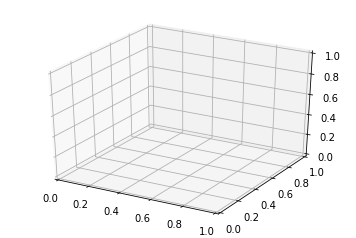

In [337]:


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#Axes3D.scatter(x1,x2, Y_pred)
#young box
                       

In [ ]:
#Média da temperatura do dia anterior

In [359]:
import sklearn
from sklearn import linear_model


reg = linear_model.Ridge (alpha = .5)
reg.fit(X,Y) 

X_teste = test[['Média de Temperatura do Dia Anterior','Média de Precipitações dos Dois Dias Anteriores','Umidade Relativa Média Dia Anterior']]



#previsao = reg.predict(X_teste)
#sklearn.metrics.mean_squared_error(test['Precipitação'], previsao)  
#reg.coef_
#reg.intercept_ 


In [361]:
"""from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X,Y)

pred = lassoReg.predict(X_test)

# calculating mse

mse = np.mean((pred - test['Precipitação'])**2)

#mse

#1346205.82

#lassoReg.score(x_cv,y_cv)

#0.5720

#pred
mse"""

"from sklearn.linear_model import Lasso\n\nlassoReg = Lasso(alpha=0.3, normalize=True)\n\nlassoReg.fit(X,Y)\n\npred = lassoReg.predict(X_test)\n\n# calculating mse\n\nmse = np.mean((pred - test['Precipitação'])**2)\n\n#mse\n\n#1346205.82\n\n#lassoReg.score(x_cv,y_cv)\n\n#0.5720\n\n#pred\nmse"

In [67]:
from sklearn.linear_model import LinearRegression

X = np.asarray(X)
Y = np.asarray(Y)

#genius_regression = LinearRegression()
#genius_regression.fit(X.reshape(-1,1),Y)

"""xfit = np.linspace(5, 40, 1000)
yfit = genius_regression.predict(xfit[:, np.newaxis])

print(genius_regression.predict(30))

plt.scatter(lista_X, lista_Y)
plt.plot(xfit, yfit)"""




'xfit = np.linspace(5, 40, 1000)\nyfit = genius_regression.predict(xfit[:, np.newaxis])\n\nprint(genius_regression.predict(30))\n\nplt.scatter(lista_X, lista_Y)\nplt.plot(xfit, yfit)'

In [183]:
print("Model slope:    ", genius_regression.coef_[0])
print("Model intercept:", genius_regression.intercept_)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


list(genius_regression.predict(X_test.reshape(-1,1))[0:5])

Model slope:     0.101827580516
Model intercept: 1.5222978017


[3.9967080082540654,
 4.5363941849911633,
 4.7196838299207435,
 4.8826079587470375,
 4.7705976201789602]

In [186]:
#Erro RSS

print(((y_test - genius_regression.predict(X_test.reshape(-1,1)))**2).sum())

#Erro MSE
print(np.mean((genius_regression.predict(X_test.reshape(-1,1)) - y_test) **2))

181830.516233
151.525430194


In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(lista_X[:, None])

array([[  2.43000000e+01,   5.90490000e+02,   1.43489070e+04],
       [  2.96000000e+01,   8.76160000e+02,   2.59343360e+04],
       [  3.14000000e+01,   9.85960000e+02,   3.09591440e+04],
       ..., 
       [  2.70000000e+01,   7.29000000e+02,   1.96830000e+04],
       [  2.30000000e+01,   5.29000000e+02,   1.21670000e+04],
       [  2.32000000e+01,   5.38240000e+02,   1.24871680e+04]])

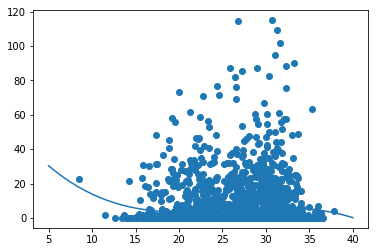

In [125]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(lista_X[:, np.newaxis], lista_Y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(lista_X, lista_Y)
plt.plot(xfit, yfit)

(-3, 120)

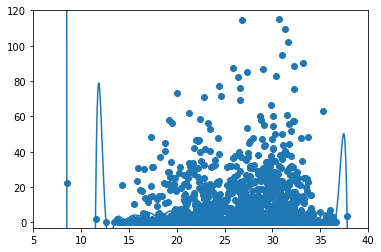

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(30),
                            LinearRegression())
gauss_model.fit(lista_X[:, np.newaxis], lista_Y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(lista_X, lista_Y)
plt.plot(xfit, yfit)
plt.xlim(5, 40)
plt.ylim(-3, 120)

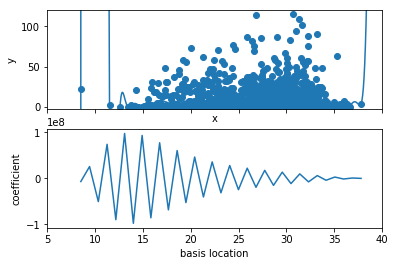

In [143]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(lista_X[:, np.newaxis], lista_Y)
    ax[0].scatter(lista_X, lista_Y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-3, 120))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(5, 40))
    
model = make_pipeline(GaussianFeatures(33), LinearRegression())
basis_plot(model)